In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [166]:
# Old file
# home_audio = pd.read_csv('C:/Data Science/Capstone Project/Model Files/HomeAudio.csv')

home_audio = pd.read_csv('C:/Data Science/Capstone Project/HomeAudio.csv')
home_audio.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2460,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2461,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2462,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2463,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2464,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [167]:
home_audio = home_audio.drop(['Unnamed: 0'], axis=1)
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,nan,0.28,0.13,0.16,-0.78,-0.64,-0.68,0.28,0.13,0.16
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,nan,-0.12,-0.10,-0.20,0.62,0.44,2.10,-0.12,-0.10,-0.20
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,nan,0.03,-0.09,-0.09,-0.11,0.92,0.92,0.03,-0.09,-0.09
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,0.10,-0.11,-0.11,0.00,1.16,1.16,0.00,-0.11,-0.11,0.00
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,-0.51,0.00,0.12,0.12,0.00,-0.54,-0.54,0.00,0.12,0.12


In [168]:
home_audio.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 'deliverybdays', 'deliverycdays', 's1_fact_order_payment_type',
       'sla', 'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'gmvperunit', 'delivery_on_time',
       'delivery_status', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       ' Affiliates', 'week_y', 'NPS', 'Stock Index', 'NPSScore',
       'holiday_count', 'ItemType', 'month_date', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock',
       'Online marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'inc_LP_MA1', 'inc_LP_MA2',
       'inc_LP_MA3', 'inc_PO_MA1', 'inc_PO_MA2', 'inc_PO_MA3', '

In [169]:
# Keeping only GMV lag of 1st week and dropping all other columns
home_audio = home_audio.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)


In [170]:
home_audio.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,2015-10-03,2015,10,"1,407,395,732,747,800.00","1,407,395,732,747,800.00","7,049.00",1,0,0,Prepaid,...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.28
1,2015-10-16,2015,10,"2,418,213,882,235,600.00","2,418,213,882,235,600.00","5,489.00",1,0,0,Prepaid,...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.12
2,2015-10-16,2015,10,"2,418,675,653,264,600.00","2,418,675,653,264,600.00","6,255.00",1,0,0,Prepaid,...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.03
3,2015-10-16,2015,10,"1,418,727,172,944,200.00","1,418,727,172,944,200.00","6,099.00",1,0,0,Prepaid,...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.11
4,2015-10-20,2015,10,"2,421,983,590,777,500.00","2,421,983,590,777,500.00","6,850.00",1,0,0,COD,...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.00


In [171]:
home_audio['GMV_lag_1_per'] = home_audio['GMV_lag_1_per'].fillna(0)

In [172]:
home_audio['GMV_lag_1_per'].isna().sum()

0

In [173]:
home_audio.columns

Index(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'gmv',
       'units', 'deliverybdays', 'deliverycdays', 's1_fact_order_payment_type',
       'sla', 'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'week', 'Pay_Day', 'is_holiday', 'special_sale',
       'Discount_Percentage', 'gmvperunit', 'delivery_on_time',
       'delivery_status', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       ' Affiliates', 'week_y', 'NPS', 'Stock Index', 'NPSScore',
       'holiday_count', 'ItemType', 'month_date', 'TV_adstock',
       'Digital_adstock', 'Sponsorship_adstock', 'Content Marketing_adstock',
       'Online marketing_adstock', 'Affiliates_adstock', 'SEM_adstock',
       'Radio_adstock', 'Other_adstock', 'GMV_lag_1_per'],
      dtype='object')

In [174]:
home_audio = home_audio.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
home_audio.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,"7,049.00",1,0,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.28
1,"5,489.00",1,0,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.12
2,"6,255.00",1,0,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.03
3,"6,099.00",1,0,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.11
4,"6,850.00",1,0,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.00


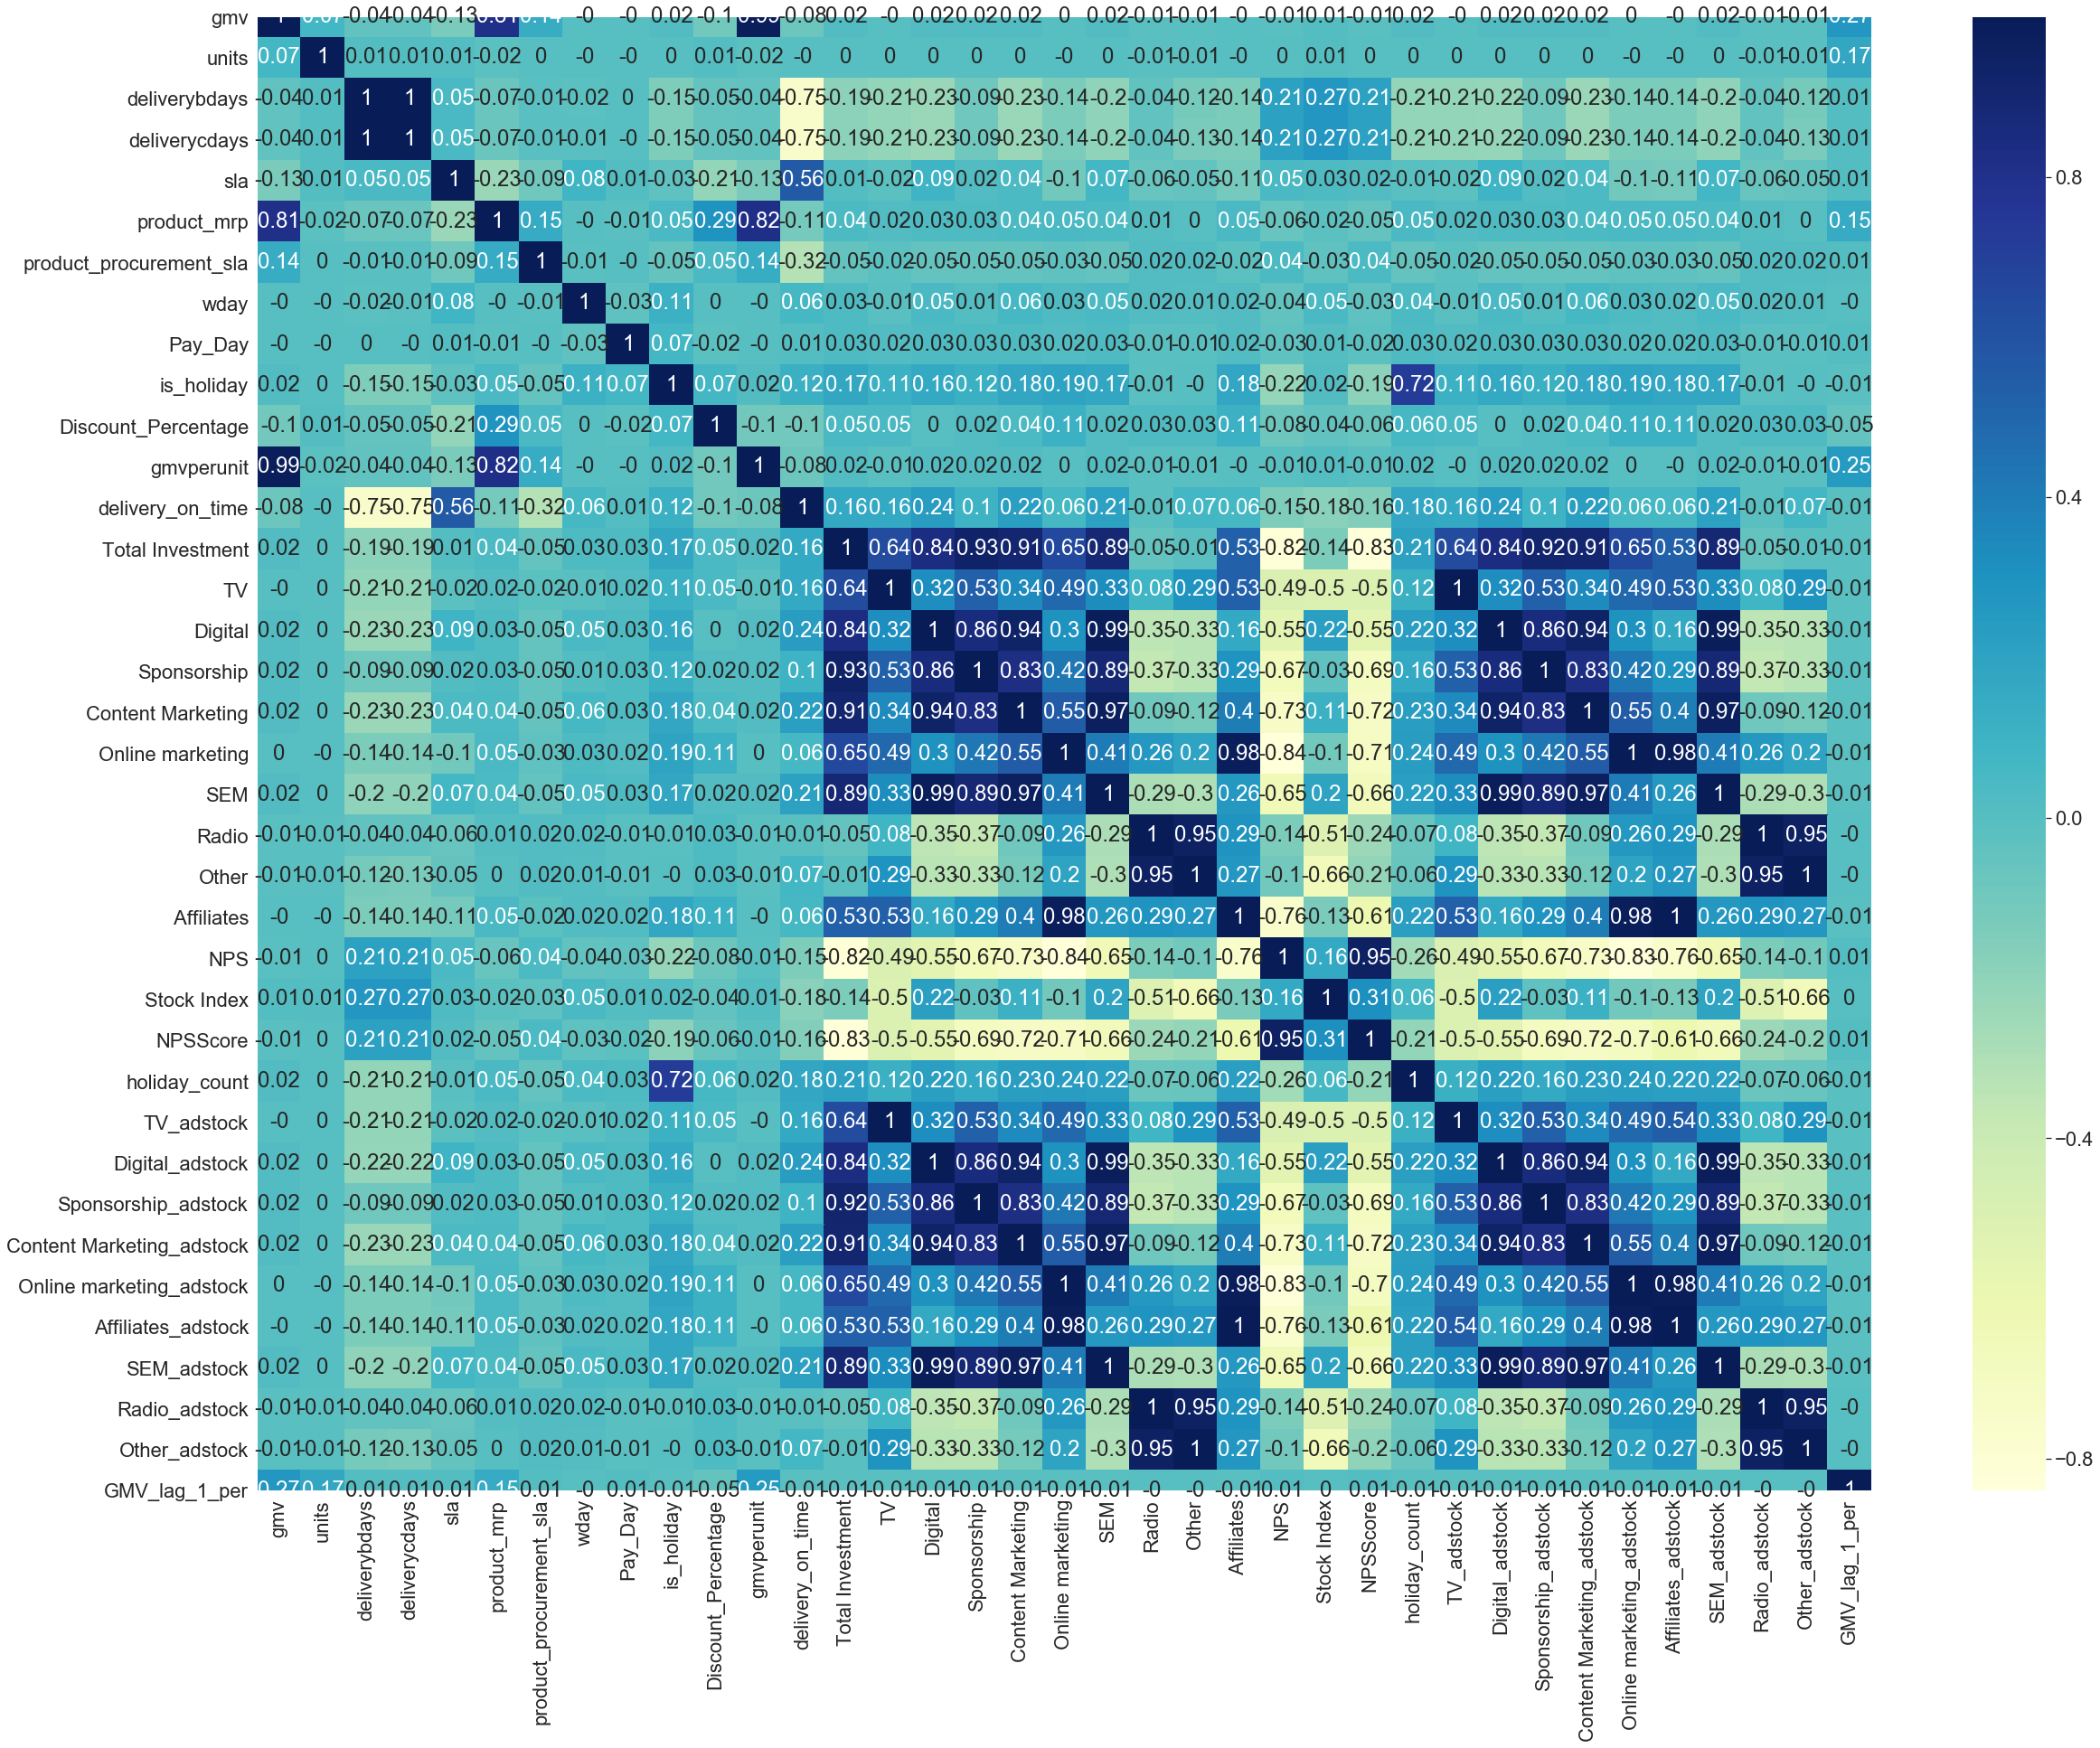

In [175]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(home_audio.corr(), 2), annot=True, cmap="YlGnBu")

In [176]:
home_audio = home_audio.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

# Doubtful
# product_mrp
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"7,049.00",1,0,Prepaid,5,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.28
1,"5,489.00",1,0,Prepaid,2,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.12
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.03
3,"6,099.00",1,0,Prepaid,3,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.11
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.00


In [177]:
home_audio.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [178]:
home_audio=home_audio.loc[(home_audio['delivery_on_time']>0)]
home_audio.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,ItemType,GMV_lag_1_per
2,"6,255.00",1,0,Prepaid,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,0.03
4,"6,850.00",1,0,COD,9,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.00
8,"6,850.00",1,0,Prepaid,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,-0.00
11,"6,700.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,Luxury,-0.03
12,"6,900.00",1,0,COD,6,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,"7,499.00",5,...,"72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,Luxury,0.07


In [179]:
home_audio.shape

(62116, 33)

### Creating dummies

In [180]:
# Subset all categorical variables
home_audio_categorical = home_audio.select_dtypes(include=['object'])
home_audio_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
2,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
4,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
8,Prepaid,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury
11,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Daussera,Early,Luxury
12,COD,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,Regular Day,Early,Luxury


In [181]:
# Subset all numerical variables
home_audio_numerical = home_audio.select_dtypes(include=['int64','float64'])
home_audio_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,GMV_lag_1_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.03
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.00
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.00
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.03
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.07


In [182]:
# Convert into dummies
dummies = pd.get_dummies(home_audio_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_DJController,product_analytic_vertical_Dock,product_analytic_vertical_DockingStation,product_analytic_vertical_FMRadio,product_analytic_vertical_HiFiSystem,product_analytic_vertical_HomeAudioSpeaker,product_analytic_vertical_KaraokePlayer,product_analytic_vertical_SlingBox,product_analytic_vertical_SoundMixer,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
11,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [183]:
# Drop categorical variable columns
home_audio = home_audio.drop(list(home_audio_categorical.columns), axis=1)

In [184]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,holiday_count,GMV_lag_1_per
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,0.03
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.00
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,-0.00
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,4.00,-0.03
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",44.40,1210,10.03,0.00,0.07


In [185]:
# Concatenate dummy variables with X
home_audio = pd.concat([home_audio, dummies], axis=1)
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0,0,0,0,0,0,1,0,0,0


In [186]:
home_audio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62116 entries, 2 to 97386
Data columns (total 48 columns):
gmv                                           62116 non-null float64
units                                         62116 non-null int64
deliverycdays                                 62116 non-null int64
sla                                           62116 non-null int64
product_mrp                                   62116 non-null float64
product_procurement_sla                       62116 non-null int64
wday                                          62116 non-null int64
Pay_Day                                       62116 non-null int64
is_holiday                                    62116 non-null int64
Discount_Percentage                           62116 non-null float64
delivery_on_time                              62116 non-null float64
Total Investment                              62116 non-null float64
TV                                            62116 non-null float64
Digital 

In [187]:
# for col in list(home_audio.columns):
#     plt.figure(figsize=(9,9))
#     sns.boxplot(data=home_audio, y=col).set_title(col)
    

In [188]:
# def remove_outlier(df_in, col_name):
#     q1 = df_in[col_name].quantile(0.25)
#     q3 = df_in[col_name].quantile(0.75)
#     iqr = q3-q1 #Interquartile range
#     fence_low  = q1-1.5*iqr
#     fence_high = q3+1.5*iqr
#     df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
#     return df_out

In [189]:
# outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
#                'Online marketing', 'SEM', 'Affiliates', 'Content Marketing', 'Radio', 'Discount_Percentage']

In [190]:
# for col in outlier_cols:
#     remove_outlier(home_audio, col)

In [191]:
# home_audio = remove_outlier(home_audio, 'gmv')
# home_audio.shape

In [192]:
# home_audio = remove_outlier(home_audio, 'sla')
# home_audio.shape

In [193]:
# home_audio = remove_outlier(home_audio, 'product_mrp')
# home_audio.shape

In [194]:
# Import the required library

from sklearn.model_selection import train_test_split

In [195]:
df_train, df_test = train_test_split(home_audio, train_size=0.7, test_size=0.3, random_state=100)

In [196]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [197]:
scaler = MinMaxScaler()


In [198]:
home_audio.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
2,"6,255.00",1,0,9,"7,499.00",5,4,0,1,16.59,...,0,1,0,0,0,0,0,0,0,0
4,"6,850.00",1,0,9,"7,499.00",5,1,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
8,"6,850.00",1,0,6,"7,499.00",5,4,0,0,8.65,...,0,0,0,0,0,0,1,0,0,0
11,"6,700.00",1,0,6,"7,499.00",5,4,0,1,10.65,...,0,1,0,0,0,0,0,0,0,0
12,"6,900.00",1,0,6,"7,499.00",5,4,0,0,7.99,...,0,0,0,0,0,0,1,0,0,0


In [199]:
# Create a list of the variables that you need to scale
varlist = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in home_audio.columns:
    if col not in dum_cols:
        varlist.append(col)

In [200]:
varlist

['gmv',
 'units',
 'deliverycdays',
 'sla',
 'product_mrp',
 'product_procurement_sla',
 'wday',
 'Discount_Percentage',
 'delivery_on_time',
 'Total Investment',
 'TV',
 'Digital',
 'Sponsorship',
 'Content Marketing',
 'Online marketing',
 'SEM',
 'Radio',
 'Other',
 'Affiliates',
 'NPS',
 'Stock Index',
 'NPSScore',
 'holiday_count',
 'GMV_lag_1_per']

In [201]:
# Scale these variables using 'fit_transform'
df_train[varlist] = scaler.fit_transform(df_train[varlist])

In [202]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
62022,0.00,0.00,0.00,0.23,0.01,0.29,1.00,0,0,0.42,...,0,0,0,0,0,0,1,0,0,1
61776,0.02,0.00,0.00,0.10,0.02,0.07,0.17,1,0,0.25,...,0,0,0,0,0,0,1,0,0,1
26367,0.03,0.00,0.00,0.13,0.03,0.36,0.17,1,0,0.22,...,0,0,0,0,0,0,1,0,0,1
41294,0.02,0.00,0.00,0.18,0.02,0.07,0.67,1,1,0.24,...,1,0,0,0,0,0,0,0,0,1
58467,0.01,0.00,0.00,0.20,0.01,0.21,0.00,0,0,0.22,...,0,0,0,0,0,0,1,0,0,1


In [203]:
# Split the train dataset into X and y

y_train = df_train.pop('gmv')
X_train = df_train

In [204]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [205]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [206]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.35664993e-01 -4.99231016e-02  1.22442426e-01  6.08382196e-01
 -4.12173238e-02  5.38984974e-05  2.87622889e-04 -9.55209142e-04
 -3.63356119e-02 -1.16894941e-01 -8.16530256e+10  2.25887370e+10
  2.51337803e+10  3.44800479e+10  2.28191219e+10  2.55591708e+10
 -2.81907025e+10  2.66780879e+10 -1.71226967e+10 -2.02544378e+10
 -8.24322268e+09  1.84338588e+08  4.61816668e+08 -2.79167381e-04
  3.81588204e-01  9.59385984e-04  4.43647202e-02 -4.69489995e-03
 -8.43086358e-03 -7.46006953e-03  3.21851821e-03 -4.65085918e-03
  4.32946201e-02 -4.63557423e-03  3.23566158e-02  6.97460953e-04
  9.17674349e-06  2.80617900e-04  1.14467781e-03  5.86352238e-04
  9.80543479e-04  1.40962357e-03 -1.16360996e-03 -4.61274349e-04
  1.52476560e-03  3.76051109e-04 -7.02939625e-03]
5928043921.684518


In [207]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[False False False  True False False False False False False  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False False False False False False False False False False False
 False False False False False False False False False False False]
[ 2  8  7  1  9 32 29 26  5  6  1  1  1  1  1  1  1  1  1  1  1  1  1 30
  1 19  4 16 12 13 18 15  3 14 10 22 33 28 23 27 24 25 17 31 20 21 11]


In [208]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,product_mrp,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,Stock Index,NPSScore,GMV_lag_1_per
62022,1.00,0.01,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.30,0.00,0.30,0.01
61776,1.00,0.02,0.58,1.00,0.14,0.48,0.11,0.76,0.09,0.32,0.59,0.84,0.30,0.00,0.30,0.01
26367,1.00,0.03,0.62,0.58,0.21,0.67,0.31,0.92,0.29,0.00,0.00,0.93,0.09,0.10,0.09,0.01
41294,1.00,0.02,0.42,0.47,0.00,0.04,0.26,0.94,0.06,1.00,1.00,1.00,0.17,0.16,0.17,0.01
58467,1.00,0.01,0.28,0.30,0.13,0.14,0.19,0.87,0.09,0.00,0.00,0.94,0.38,0.91,0.60,0.01


In [209]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:59:26   Log-Likelihood:             1.2147e+05
No. Observations:               43481   AIC:                        -2.429e+05
Df Residuals:                   43467   BIC:                        -2.428e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3.586e+08   1.51e+0

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [79]:
# Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,Total Investment,inf
3,TV,inf
5,Sponsorship,inf
7,Online marketing,inf
11,Affiliates,inf
12,NPS,inf
14,NPSScore,inf
13,Stock Index,"3,638,463.33"
8,SEM,"1,465,476.92"
9,Radio,"1,167,268.59"


In [80]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:24:22   Log-Likelihood:             1.2147e+05
No. Observations:               43481   AIC:                        -2.429e+05
Df Residuals:                   43467   BIC:                        -2.428e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -9.9519      0.638    -15.591      0.000     -11.203      -8.701
product_mrp           0.6211      0.002    341.109      0.000       0.617       0.625
TV                  -26.2337      1.672    -15.694      0.000     -29.510     -22.957
Digital              -8.8061      0.538    -16.360      0.000      -9.861      -7.751
Sponsorship          13.5944      0.868     15.667      0.000      11.894      15.295
Content Marketing   -17.5165      1.162    -15.080      0.000     -19.793     -15.240
Online marketing    -44.9655      2.855    -15.752      0.000     -50.560     -39.371
SEM                  27.5767      1.762     15.655      0.000      24.124      31.029
Radio               -27.8325      1.747    -15.935      0.000     -31.256     -24.409
Other                32.6756      2.061     15.852      0.000      28.635      36.716
Affiliates           60.3450      3.842     15.707      0.000      52.815      67.875
NPS                  27.5249      1.738     15.834      0.000      24.118      30.932
Stock Index           0.3816      0.025     15.118      0.000       0.332       0.431
NPSScore            -17.2887      1.085    -15.932      0.000     -19.416     -15.162
GMV_lag_1_per         0.4856      0.009     55.736      0.000       0.469       0.503
==============================================================================
Omnibus:                    18782.967   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39476456.213
Skew:                          -0.281   Prob(JB):                         0.00
Kurtosis:                     150.612   Cond. No.                     1.08e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.4e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
2,TV,inf
3,Digital,inf
4,Sponsorship,inf
5,Content Marketing,inf
6,Online marketing,inf
7,SEM,inf
8,Radio,inf
9,Other,inf
10,Affiliates,inf
11,NPS,inf


In [82]:
X_train_rfe1 = X_train_rfe1.drop('TV', axis=1)
lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.011e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:25:10   Log-Likelihood:             1.2147e+05
No. Observations:               43481   AIC:                        -2.429e+05
Df Residuals:                   43467   BIC:                        -2.428e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.4526      0.479    -15.556      0.000      -8.392      -6.514
product_mrp           0.6211      0.002    341.109      0.000       0.617       0.625
Digital             149.6809      9.572     15.638      0.000     130.920     168.442
Sponsorship          25.1425      1.603     15.680      0.000      22.000      28.285
Content Marketing    93.4138      5.915     15.794      0.000      81.821     105.007
Online marketing   -184.6698     11.756    -15.708      0.000    -207.712    -161.628
SEM                -260.2032     16.575    -15.698      0.000    -292.691    -227.715
Radio                71.7250      4.601     15.590      0.000      62.708      80.742
Other               -92.0369      5.887    -15.635      0.000    -103.575     -80.499
Affiliates          191.1796     12.178     15.698      0.000     167.310     215.049
NPS                 121.6914      7.738     15.727      0.000     106.525     136.858
Stock Index           3.8320      0.239     16.004      0.000       3.363       4.301
NPSScore           -127.5664      8.110    -15.729      0.000    -143.463    -111.670
GMV_lag_1_per         0.4856      0.009     55.736      0.000       0.469       0.503
==============================================================================
Omnibus:                    18782.967   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39476456.214
Skew:                          -0.281   Prob(JB):                         0.00
Kurtosis:                     150.612   Cond. No.                     7.78e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
6,SEM,"7,360,187,922.71"
2,Digital,"2,462,734,232.03"
9,Affiliates,"2,197,939,310.87"
5,Online marketing,"2,106,221,963.98"
4,Content Marketing,"901,433,951.31"
8,Other,"886,831,784.99"
12,NPSScore,"700,562,931.10"
7,Radio,"473,617,220.52"
10,NPS,"459,362,268.86"
3,Sponsorship,"66,216,937.05"


In [84]:
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.087e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:25:45   Log-Likelihood:             1.2135e+05
No. Observations:               43481   AIC:                        -2.427e+05
Df Residuals:                   43468   BIC:                        -2.426e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0658      0.012      5.302      0.000       0.041       0.090
product_mrp           0.6221      0.002    340.978      0.000       0.619       0.626
Digital              -0.5705      0.116     -4.910      0.000      -0.798      -0.343
Sponsorship          -0.0293      0.008     -3.747      0.000      -0.045      -0.014
Content Marketing     0.5825      0.120      4.850      0.000       0.347       0.818
Online marketing     -0.1198      0.026     -4.584      0.000      -0.171      -0.069
Radio                -0.4803      0.100     -4.812      0.000      -0.676      -0.285
Other                 0.3673      0.075      4.866      0.000       0.219       0.515
Affiliates            0.0001      0.009      0.016      0.987      -0.017       0.017
NPS                   0.2247      0.051      4.369      0.000       0.124       0.326
Stock Index           0.0821      0.016      4.984      0.000       0.050       0.114
NPSScore             -0.2511      0.055     -4.542      0.000      -0.359      -0.143
GMV_lag_1_per         0.4979      0.009     57.218      0.000       0.481       0.515
==============================================================================
Omnibus:                    18782.795   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39101239.494
Skew:                          -0.285   Prob(JB):                         0.00
Kurtosis:                     149.909   Cond. No.                     5.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Content Marketing,"369,672.38"
2,Digital,"360,898.36"
6,Radio,"221,620.01"
7,Other,"145,018.50"
11,NPSScore,"32,369.88"
0,const,"30,324.00"
9,NPS,"20,189.80"
5,Online marketing,"10,357.92"
10,Stock Index,"7,962.79"
3,Sponsorship,"1,567.18"


In [86]:
X_train_rfe1 = X_train_rfe1.drop('Content Marketing', axis=1)
lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.185e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:39:32   Log-Likelihood:             1.2133e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43469   BIC:                        -2.425e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0060      0.001      4.397      0.000       0.003       0.009
product_mrp          0.6222      0.002    340.956      0.000       0.619       0.626
Digital             -0.0071      0.001     -5.818      0.000      -0.009      -0.005
Sponsorship          0.0079      0.002      5.189      0.000       0.005       0.011
Online marketing -2.883e-05      0.009     -0.003      0.997      -0.017       0.017
Radio                0.0034      0.004      0.958      0.338      -0.004       0.010
Other                0.0016      0.003      0.468      0.640      -0.005       0.008
Affiliates          -0.0101      0.008     -1.201      0.230      -0.027       0.006
NPS                 -0.0235      0.005     -4.525      0.000      -0.034      -0.013
Stock Index          0.0023      0.001      3.394      0.001       0.001       0.004
NPSScore             0.0164      0.004      4.457      0.000       0.009       0.024
GMV_lag_1_per        0.4989      0.009     57.334      0.000       0.482       0.516
==============================================================================
Omnibus:                    18730.447   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39248831.642
Skew:                          -0.269   Prob(JB):                         0.00
Kurtosis:                     150.186   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Online marketing,"1,109.19"
7,Affiliates,"1,036.95"
0,const,363.43
6,Other,288.03
5,Radio,280.31
8,NPS,204.99
10,NPSScore,143.70
3,Sponsorship,59.28
2,Digital,39.33
9,Stock Index,13.26


In [88]:
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.303e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:40:12   Log-Likelihood:             1.2133e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43470   BIC:                        -2.426e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0060      0.001      4.670      0.000       0.003       0.008
product_mrp       0.6222      0.002    340.979      0.000       0.619       0.626
Digital          -0.0071      0.001     -7.354      0.000      -0.009      -0.005
Sponsorship       0.0079      0.001      6.196      0.000       0.005       0.010
Radio             0.0034      0.001      2.853      0.004       0.001       0.006
Other             0.0016      0.001      1.365      0.172      -0.001       0.004
Affiliates       -0.0101      0.001     -6.800      0.000      -0.013      -0.007
NPS              -0.0235      0.005     -4.539      0.000      -0.034      -0.013
Stock Index       0.0023      0.001      4.399      0.000       0.001       0.003
NPSScore          0.0164      0.004      4.469      0.000       0.009       0.024
GMV_lag_1_per     0.4989      0.009     57.349      0.000       0.482       0.516
==============================================================================
Omnibus:                    18730.468   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39248841.333
Skew:                          -0.269   Prob(JB):                         0.00
Kurtosis:                     150.186   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,322.38
7,NPS,203.73
9,NPSScore,142.91
3,Sponsorship,41.56
5,Other,34.30
6,Affiliates,32.52
4,Radio,31.40
2,Digital,24.63
8,Stock Index,7.90
1,product_mrp,1.03


In [90]:
X_train_rfe1 = X_train_rfe1.drop('NPS', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.447e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:40:46   Log-Likelihood:             1.2132e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43471   BIC:                        -2.425e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0010      0.001      1.540      0.123      -0.000       0.002
product_mrp       0.6223      0.002    340.971      0.000       0.619       0.626
Digital          -0.0048      0.001     -5.855      0.000      -0.006      -0.003
Sponsorship       0.0047      0.001      4.411      0.000       0.003       0.007
Radio             0.0025      0.001      2.158      0.031       0.000       0.005
Other            -0.0002      0.001     -0.202      0.840      -0.002       0.002
Affiliates       -0.0036      0.000     -8.645      0.000      -0.004      -0.003
Stock Index       0.0021      0.001      3.992      0.000       0.001       0.003
NPSScore          0.0002      0.001      0.187      0.852      -0.001       0.002
GMV_lag_1_per     0.4993      0.009     57.387      0.000       0.482       0.516
==============================================================================
Omnibus:                    18696.215   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39529834.683
Skew:                          -0.256   Prob(JB):                         0.00
Kurtosis:                     150.712   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,89.48
4,Radio,30.60
5,Other,30.28
3,Sponsorship,28.58
2,Digital,18.18
7,Stock Index,7.83
8,NPSScore,6.93
6,Affiliates,2.60
1,product_mrp,1.03
9,GMV_lag_1_per,1.03


In [92]:
X_train_rfe1 = X_train_rfe1.drop('NPSScore', axis=1)
lm_8 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.628e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:41:18   Log-Likelihood:             1.2132e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43472   BIC:                        -2.426e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      2.792      0.005       0.000       0.002
product_mrp       0.6223      0.002    340.988      0.000       0.619       0.626
Digital          -0.0048      0.001     -5.858      0.000      -0.006      -0.003
Sponsorship       0.0046      0.001      4.868      0.000       0.003       0.006
Radio             0.0024      0.001      2.528      0.011       0.001       0.004
Other            -0.0001      0.001     -0.134      0.894      -0.002       0.002
Affiliates       -0.0037      0.000     -9.477      0.000      -0.004      -0.003
Stock Index       0.0021      0.001      4.032      0.000       0.001       0.003
GMV_lag_1_per     0.4994      0.009     57.396      0.000       0.482       0.516
==============================================================================
Omnibus:                    18695.438   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39531597.048
Skew:                          -0.256   Prob(JB):                         0.00
Kurtosis:                     150.715   Cond. No.                         191.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,32.75
5,Other,24.59
3,Sponsorship,22.56
4,Radio,20.09
2,Digital,18.08
7,Stock Index,7.75
6,Affiliates,2.20
1,product_mrp,1.03
8,GMV_lag_1_per,1.03


In [94]:
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)
lm_9 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.861e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:41:53   Log-Likelihood:             1.2132e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43473   BIC:                        -2.426e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.000      3.084      0.002       0.000       0.002
product_mrp       0.6223      0.002    341.092      0.000       0.619       0.626
Digital          -0.0048      0.001     -6.012      0.000      -0.006      -0.003
Sponsorship       0.0046      0.001      5.001      0.000       0.003       0.006
Radio             0.0023      0.000      5.010      0.000       0.001       0.003
Affiliates       -0.0037      0.000     -9.574      0.000      -0.004      -0.003
Stock Index       0.0021      0.000      4.698      0.000       0.001       0.003
GMV_lag_1_per     0.4994      0.009     57.396      0.000       0.482       0.516
==============================================================================
Omnibus:                    18695.816   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39531281.261
Skew:                          -0.256   Prob(JB):                         0.00
Kurtosis:                     150.715   Cond. No.                         190.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,25.66
3,Sponsorship,21.62
2,Digital,17.32
6,Stock Index,5.90
4,Radio,4.65
5,Affiliates,2.17
1,product_mrp,1.03
7,GMV_lag_1_per,1.03


In [96]:
X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
lm_10 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 2.169e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:42:29   Log-Likelihood:             1.2131e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43474   BIC:                        -2.425e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0022      0.000      7.793      0.000       0.002       0.003
product_mrp       0.6226      0.002    341.370      0.000       0.619       0.626
Digital          -0.0010      0.000     -4.376      0.000      -0.001      -0.001
Radio             0.0005      0.000      1.698      0.090   -7.25e-05       0.001
Affiliates       -0.0024      0.000     -8.424      0.000      -0.003      -0.002
Stock Index       0.0002      0.000      0.760      0.447      -0.000       0.001
GMV_lag_1_per     0.5005      0.009     57.530      0.000       0.483       0.518
==============================================================================
Omnibus:                    18681.247   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39678311.147
Skew:                          -0.250   Prob(JB):                         0.00
Kurtosis:                     150.989   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,15.99
3,Radio,1.70
5,Stock Index,1.51
2,Digital,1.31
4,Affiliates,1.16
1,product_mrp,1.03
6,GMV_lag_1_per,1.03


In [98]:
X_train_rfe1 = X_train_rfe1.drop('Stock Index', axis=1)
lm_11 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 2.603e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:43:16   Log-Likelihood:             1.2131e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43475   BIC:                        -2.426e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.000      9.483      0.000       0.002       0.003
product_mrp       0.6226      0.002    341.417      0.000       0.619       0.626
Digital          -0.0009      0.000     -4.309      0.000      -0.001      -0.001
Radio             0.0004      0.000      1.519      0.129      -0.000       0.001
Affiliates       -0.0024      0.000     -8.431      0.000      -0.003      -0.002
GMV_lag_1_per     0.5005      0.009     57.534      0.000       0.483       0.518
==============================================================================
Omnibus:                    18681.917   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39682231.934
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                     150.996   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,11.89
3,Radio,1.32
2,Digital,1.28
4,Affiliates,1.16
1,product_mrp,1.03
5,GMV_lag_1_per,1.03


In [100]:
X_train_rfe1 = X_train_rfe1.drop('Radio', axis=1)
lm_12 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 3.254e+04
Date:                Sun, 15 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:43:53   Log-Likelihood:             1.2131e+05
No. Observations:               43481   AIC:                        -2.426e+05
Df Residuals:                   43476   BIC:                        -2.426e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.000      9.442      0.000       0.002       0.003
product_mrp       0.6226      0.002    341.408      0.000       0.619       0.626
Digital          -0.0011      0.000     -5.533      0.000      -0.001      -0.001
Affiliates       -0.0022      0.000     -8.416      0.000      -0.003      -0.002
GMV_lag_1_per     0.5005      0.009     57.530      0.000       0.483       0.518
==============================================================================
Omnibus:                    18676.666   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39677848.555
Skew:                          -0.249   Prob(JB):                         0.00
Kurtosis:                     150.988   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,11.88
1,product_mrp,1.03
2,Digital,1.03
3,Affiliates,1.03
4,GMV_lag_1_per,1.03


In [102]:
# Predicting using the 12th model
y_train_price = lm_12.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

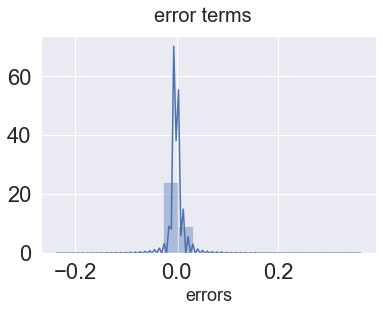

In [103]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)  

In [104]:
df_test[varlist] = scaler.transform(df_test[varlist])

In [105]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [106]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [107]:
col1

Index(['product_mrp', 'Total Investment', 'TV', 'Digital', 'Sponsorship',
       'Content Marketing', 'Online marketing', 'SEM', 'Radio', 'Other',
       'Affiliates', 'NPS', 'Stock Index', 'NPSScore', 'GMV_lag_1_per'],
      dtype='object')

In [108]:
# Let's now drop the variables we had manually eliminated as well
# X_test_rfe2 = X_test_rfe2.drop(['SEM', 'Total Investment', 'Online marketing', 'Sponsorship', 'Affiliates', 'TV', 
#                                'Other', 'Digital'], axis = 1)

X_test_rfe2 = X_test_rfe2.drop(['Total Investment', 'TV', 'Sponsorship', 'Content Marketing', 'Stock Index',
       'SEM', 'Other', 'NPS', 'NPSScore', 'Online marketing', 'Radio'], axis = 1)


In [109]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18635 entries, 44315 to 1387
Data columns (total 5 columns):
const            18635 non-null float64
product_mrp      18635 non-null float64
Digital          18635 non-null float64
Affiliates       18635 non-null float64
GMV_lag_1_per    18635 non-null float64
dtypes: float64(5)
memory usage: 873.5 KB


In [110]:
# Making predictions
y_pred = lm_12.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

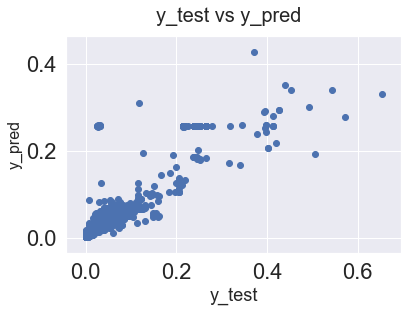

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [115]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7592767408568618

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [117]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.013903773713139219

In [118]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [119]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [120]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:
regr.score(X_test, y_test)

0.8517629005683809

In [122]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)  

Cross Validation scores:  [ 8.55382796e-01 -7.99599365e+15  8.40335000e-01 -1.28469261e+16
  8.52210996e-01]
Mean and std deviation:  -4168583943200173.0 5330927936473956.0


0.8517629005683809

In [123]:
accuracy

0.84956189545615

In [124]:
scores

array([ 8.55382796e-01, -7.99599365e+15,  8.40335000e-01, -1.28469261e+16,
        8.52210996e-01])

### Different types of regression

In [210]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# prepare a range of alpha values to test
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8410722436926131
0.1


In [211]:
from scipy.stats import uniform as sp_rand
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_train, y_train)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='warn', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FA9772B4C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.8411000714730451
0.19685538954862203


In [214]:
# model with optimal alpha
lm = Ridge(alpha=0.19)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8425562300352869
0.8519045746631604


In [215]:
rmse = sqrt(mean_squared_error(y_test_pred, y_test))

print(rmse)

0.010905472458377887
